In [2]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [3]:
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:3], y[:3]

(tensor([[0.0000],
         [0.0200],
         [0.0400]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280]]))

In [4]:
# Create train/test split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [5]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  plt.figure(figsize=(10,7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 12});

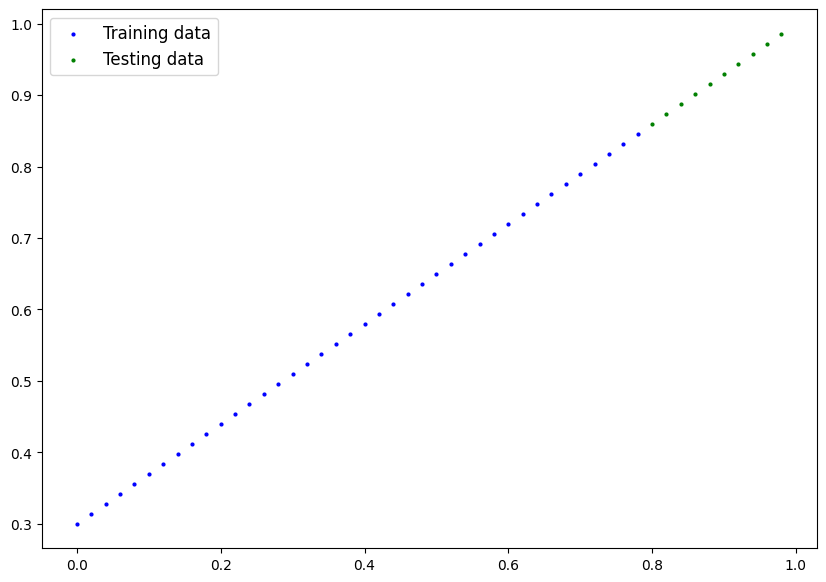

In [6]:
plot_predictions();

In [7]:
class LinearRegressionmodel_2(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,dtype=torch.float),requires_grad=True)
        self.bias = nn.Parameter(torch.randn(1, dtype=torch.float),requires_grad=True)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias

In [52]:
torch.manual_seed(42)
model_2 = LinearRegressionmodel_2()
optimizer = torch.optim.SGD(params=model_2.parameters(), lr=0.01)


In [9]:
model_2.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [10]:
with torch.inference_mode():
    y_preds = model_2(X_test)

In [11]:
print(f"Number of testing samples: {len(X_test)}")
print(f"Number of predictions made: {len(y_preds)}")
print(f"Predicted values:\n{y_preds}")

Number of testing samples: 10
Number of predictions made: 10
Predicted values:
tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])


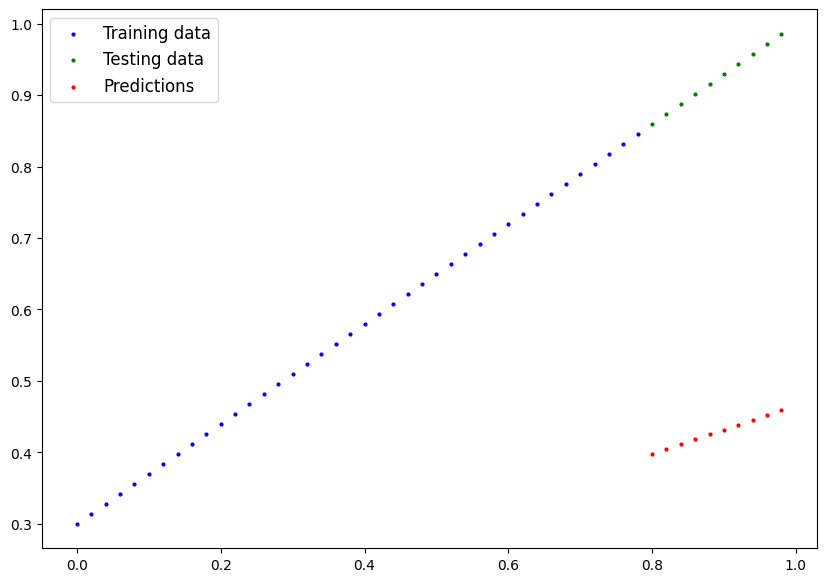

In [12]:
plot_predictions(predictions=y_preds)

In [13]:
y_test - y_preds

tensor([[0.4618],
        [0.4691],
        [0.4764],
        [0.4836],
        [0.4909],
        [0.4982],
        [0.5054],
        [0.5127],
        [0.5200],
        [0.5272]])

In [119]:
#model_2 = torch.nn.Linear(in_features=1, out_features=1)
loss_fn = nn.L1Loss()
model_2 = LinearRegressionmodel_2()
optimizer = torch.optim.Adam(params=model_2.parameters(),
                            lr=0.0001)


In [120]:
torch.manual_seed(42)
epochs =1520

train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    model_2.train()
    y_pred = model_2(X_train)
    loss = loss_fn(y_pred, y_train)
    loss.backward()
    optimizer.step()
    model_2.eval()
    with torch.inference_mode():
      test_pred = model_2(X_test)
      test_loss = loss_fn(test_pred, y_test.type(torch.float))
      if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

Epoch: 0 | MAE Train Loss: 0.31288138031959534 | MAE Test Loss: 0.4943471848964691 
Epoch: 10 | MAE Train Loss: 0.3115127980709076 | MAE Test Loss: 0.4924796223640442 
Epoch: 20 | MAE Train Loss: 0.3099955916404724 | MAE Test Loss: 0.4903935492038727 
Epoch: 30 | MAE Train Loss: 0.3083178400993347 | MAE Test Loss: 0.4880925118923187 
Epoch: 40 | MAE Train Loss: 0.3065096139907837 | MAE Test Loss: 0.4856185019016266 
Epoch: 50 | MAE Train Loss: 0.3046015202999115 | MAE Test Loss: 0.48301249742507935 
Epoch: 60 | MAE Train Loss: 0.3026188015937805 | MAE Test Loss: 0.4803079664707184 
Epoch: 70 | MAE Train Loss: 0.3005802631378174 | MAE Test Loss: 0.4775296151638031 
Epoch: 80 | MAE Train Loss: 0.2984996438026428 | MAE Test Loss: 0.47469568252563477 
Epoch: 90 | MAE Train Loss: 0.29638662934303284 | MAE Test Loss: 0.471818745136261 
Epoch: 100 | MAE Train Loss: 0.2942483723163605 | MAE Test Loss: 0.4689083695411682 
Epoch: 110 | MAE Train Loss: 0.29209011793136597 | MAE Test Loss: 0.46597

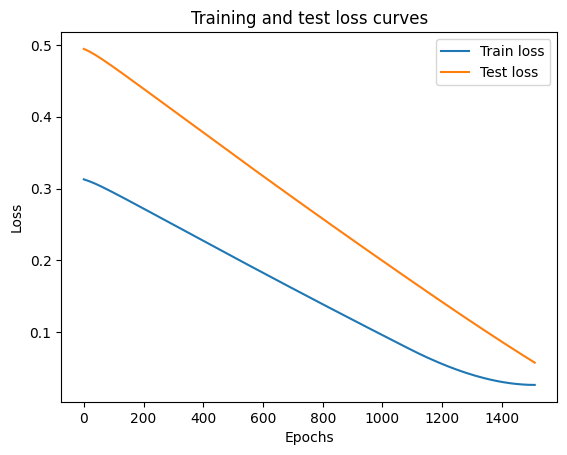

In [121]:
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [122]:
print("The model_2 learned from the following values for weights and bias:")
print(model_2.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model_2 learned from the following values for weights and bias:
OrderedDict([('weights', tensor([0.5699])), ('bias', tensor([0.3603]))])

And the original values for weights and bias are:
weights: 0.7, bias: 0.3


In [123]:
model_2.eval()
with torch.inference_mode():
  y_preds = model_2(X_test)
y_preds

tensor([[0.8162],
        [0.8276],
        [0.8390],
        [0.8504],
        [0.8618],
        [0.8731],
        [0.8845],
        [0.8959],
        [0.9073],
        [0.9187]])

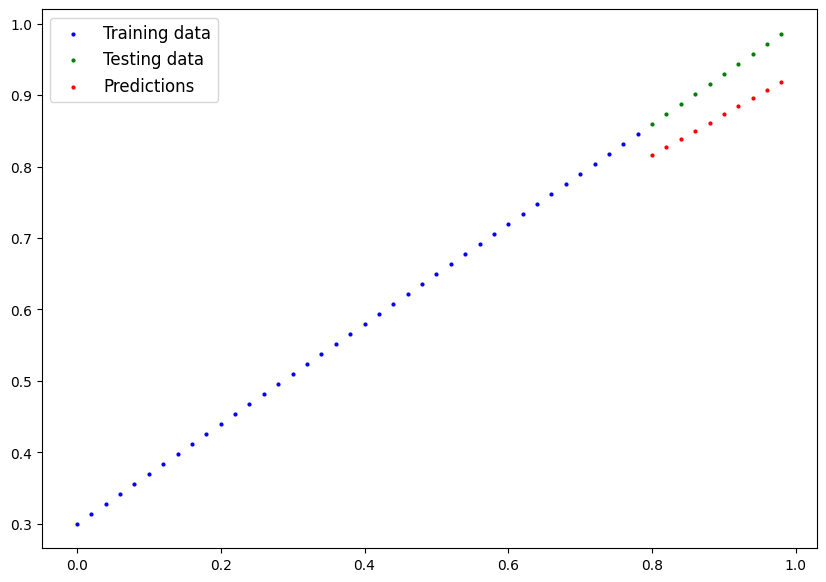

In [124]:
plot_predictions(predictions=y_preds)